In [2]:
import transforms3d.quaternions as tf
import sympy
sympy.init_printing()

In [23]:
a = sympy.symbols('a_1:3')
b = sympy.symbols('b_1:3')
c = sympy.symbols('c_1:3')
d = sympy.symbols('d_1:3')

q0 = sympy.Matrix([a[0], b[0], c[0], d[0]])
q1 = sympy.Matrix([a[1], b[1], c[1], d[1]])

In [24]:
def qmult(q0, q1):
    res = sympy.Matrix(tf.qmult(q0, q1))
    res.simplify()
    return res

def qconj(q):
    return sympy.Matrix([q[0], -q[1], -q[2], -q[3]])

def qnorm(q):
    return sympy.sqrt(qmult(q, qconj(q))[0])

In [25]:
qmult(q0, q1)

⎡a₁⋅a₂ - b₁⋅b₂ - c₁⋅c₂ - d₁⋅d₂⎤
⎢                             ⎥
⎢a₁⋅b₂ + a₂⋅b₁ + c₁⋅d₂ - c₂⋅d₁⎥
⎢                             ⎥
⎢a₁⋅c₂ + a₂⋅c₁ - b₁⋅d₂ + b₂⋅d₁⎥
⎢                             ⎥
⎣a₁⋅d₂ + a₂⋅d₁ + b₁⋅c₂ - b₂⋅c₁⎦

In [26]:
qconj(q1).T

[a₂  -b₂  -c₂  -d₂]

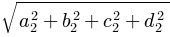

In [27]:
qnorm(q1)

In [28]:
qmult(q0, qconj(q0)/qnorm(q0)**2)

⎡1⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [29]:
qmult(q0, qconj(q0)/qnorm(q0))

⎡   _______________________⎤
⎢  ╱   2     2     2     2 ⎥
⎢╲╱  a₁  + b₁  + c₁  + d₁  ⎥
⎢                          ⎥
⎢            0             ⎥
⎢                          ⎥
⎢            0             ⎥
⎢                          ⎥
⎣            0             ⎦

In [44]:
def qinv(q):
    res = qconj(q)/qnorm(q)**2
    res.simplify()
    return res

In [50]:
qmult(q0, qinv(q1))

⎡a₁⋅a₂ + b₁⋅b₂ + c₁⋅c₂ + d₁⋅d₂ ⎤
⎢───────────────────────────── ⎥
⎢      2     2     2     2     ⎥
⎢    a₂  + b₂  + c₂  + d₂      ⎥
⎢                              ⎥
⎢-a₁⋅b₂ + a₂⋅b₁ - c₁⋅d₂ + c₂⋅d₁⎥
⎢──────────────────────────────⎥
⎢      2     2     2     2     ⎥
⎢    a₂  + b₂  + c₂  + d₂      ⎥
⎢                              ⎥
⎢-a₁⋅c₂ + a₂⋅c₁ + b₁⋅d₂ - b₂⋅d₁⎥
⎢──────────────────────────────⎥
⎢      2     2     2     2     ⎥
⎢    a₂  + b₂  + c₂  + d₂      ⎥
⎢                              ⎥
⎢-a₁⋅d₂ + a₂⋅d₁ - b₁⋅c₂ + b₂⋅c₁⎥
⎢──────────────────────────────⎥
⎢      2     2     2     2     ⎥
⎣    a₂  + b₂  + c₂  + d₂      ⎦